In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
#import pixiedust

# Algorithms

# <center>Neural Network Class</center>

In [2]:
class Layer:
        
        def __init__(self,inputs,neurons,activation,derivative):
            """
                creates a layer in the Neural Network
                
                Inputs:
                    inputs     : the number of nodes in previous layer
                    neurons    : the number of neurons in current layer
                    activation : the activation function to be used
            """
            
            #Weight matrix
            self.W = np.random.randn(neurons,inputs+1)
            
            #Bias
            #self.b = np.zeros((neurons,1))
            
            #activation function
            self.act = activation
            
            #derivative function
            self.div = derivative
            
        
        def feedFoward(self,A_prev):
            
            """
                computes the output of current layer
                
                Inputs:
                    A_prev : outputs from the previous layer
                    
                Outputs:
                    A      : output from current Layer
            """
            m,n = A_prev.shape
            self.A_prev = A_prev
            
            
            ones = np.ones((1,n))
            temp = np.vstack([ones,A_prev])
            
    
            self.Z = self.W @ temp
            self.A = self.act(self.Z)
            
            return self.A
        
        
        def backprop(self,dA,alpha):
            
            """
                calculates the derivatives at the current layer
            """
            
            #learning rate
            
            
            
            div_term = self.div(self.A_prev)
            dA_prev = (self.W.T[1:] @ dA) * div_term
           
            return dA_prev
        
        
        
        def set_weights(self,W):
            self.W = W
        




class Neural_Network:
    
    def __init__(self,param,func,deriv):
        
        """
            Initialises NN
            
            Inputs:
                param : the dimensions of the NN
                func  : the activation function that will be used
                deriv : derivative of func
        """
        
        
        #ATTRIBUTES
        
        #number of layers
        self.s = len(param)
        
        #the activation function
        self.func = func
        
        #the derivative of activation function
        self.deriv = deriv
        
        #creating layers#
        self.Layers = []
        
        
        #deltas#
        self.delta = []
        
        #A values#
        self.A_list = []
        
        for i in range(1,len(param),1):
            
            temp = Layer(param[i-1],param[i],self.func,self.deriv)
            self.Layers.append(temp)
        
        
        
    def predict(self,X):
        
        """
            Makes prediction off the dataset given
        """
        
        A = X.T
        self.A_list = [A]
        
        for layer in self.Layers:
            A = layer.feedFoward(A)
            self.A_list.append(A)
        
        #print(self.A_list)
        return A
        
        
    def train(self,X,y,alpha,epoch):
        
        for j in range(epoch):
            A = self.predict(X)
        
            dA = A - y

            self.delta = [dA]

            
            #calculating delta errors
            for i in range(len(self.Layers)-1,0,-1):

                dA = self.Layers[i].backprop(dA,alpha)
                self.delta.insert(0,dA)


            #getting update matrices
            up_D  = self.Deltas()
            
            i = 0
            
            for layer in self.Layers:
                #TODO: Regularise here
                wNew = (alpha* 1/len(y)) * up_D[i]
                layer.W = layer.W - wNew
                i+=1

    
    def Deltas(self):
        
        upper_D = []
        
        for i in range(0,len(self.delta),1):
                     
            m,n = self.A_list[i].shape
            ones = np.ones((1,n))
            aValue = np.vstack([ones,self.A_list[i]])
            
            
            temp = self.delta[i] @ aValue.T
            upper_D.append(temp)
    
        return upper_D
    
    
    def setWeights(self,W,index):
        
        self.Layers[index].set_weights(W)
          

# <center>Logistic Model</center>

# Logistic Regression

using the definition of dot product, logistic regression can be simplified to this expression:
$$\theta = \theta - \frac{\alpha}{m}(h(\theta X^{T}) - y) \cdot X^{T} + \lambda \theta$$

where:

$\alpha$ : the learning rate

$m$ : the number of features

$\theta$ : the initial learning parameters

$X$ : the data given in the design matrix format

$\lambda$ : the regularisation term

$h(\theta X^{T})$ : 

In [3]:
def LogisticRegression(X,y,theta0,alpha,tol,L,num_iter):
    """
        computes theta values using the psuedo inverse
        
        inputs:
            X        : data in the form of the design matrix
            y        : the labels associated with the data
            theta0   : the intial guess on the learning parameters
            alpha    : the learning rate
            tol      : the margin of error
            num_iter : the number of times algorithms must loop
            L        : the regularisation parameter(lambda)
            
        outputs:
            theta    : the learning parameters given the model
    """
    
    
    sigmoid = lambda z: 1/(1+np.exp(-z))
    
    i = 1
    V = np.copy(theta0)
    V[0] = 0
    theta_new  = theta0 - alpha*(sigmoid(theta0 @ X.T) - y) @ X + L*V
    
    while np.linalg.norm(theta_new-theta0) >tol and i <=num_iter:
        i+=1
        theta0 = theta_new
        V = np.copy(theta0)
        V[0] = 0
        theta_new  = theta0 - alpha*(sigmoid(theta0 @ X.T) - y) @ X + L*V
    
    return theta_new

In [4]:
def y_subset(y,value):
    
    """
        creates the sub labels for that specific label to train multiclass logistic regression
        
        inputs:
            y        : the true labels associated with the data
            value    : the label that will be used to generate the y_subset
        
        outputs:
            y_subset : the labels that will be used to train the logistic regression 
    """
    
    ans = []
    
    for i in range(0,len(y),1):
        
        if(y[i]==value):
            ans.append(1)
        else:
            ans.append(0)
    return ans

In [5]:
def One_vs_all(X,y,Theta0,alpha,tol,L,num_iter):

    """
        computes theta Matrix using the logistic Regression
        
        inputs:
            X        : data in the form of the design matrix
            y        : the labels associated with the data
            theta0   : the intial guess on the learning parameters
            alpha    : the learning rate
            tol      : the margin of error
            num_iter : the number of times algorithms must loop
            L        : the regularisation parameter(lambda)
            
        outputs:
            theta    : the learning parameters given the model
    """
    
    outcomes = np.unique(y)
    Param = []
    
    for i in range(len(outcomes)):
        
        value = outcomes[i]
        y_sub = y_subset(y,value)
        temp_theta = Theta0[i,:]
        temp_param = LogisticRegression(X,y_sub,temp_theta,alpha,tol,L,num_iter)
        Param.append(temp_param)
        
    return np.array(Param)

In [130]:
class LogisticModel:

    def __init__(self,multiclass):

        """
            intialises the Logistic model class

            Inputs:
                multiclass: specifics if model is a binary classifier or not
        """

        self.W = None
        self.multiclass = multiclass

    def train(self,data,y,Theta0,alpha,tol,L,num_iter):

        """
        computes theta Matrix using the logistic Regression
        
        inputs:
            X        : data in the form of the design matrix
            y        : the labels associated with the data
            theta0   : the intial guess on the learning parameters
            alpha    : the learning rate
            tol      : the margin of error
            num_iter : the number of times algorithms must loop
            L        : the regularisation parameter(lambda)
        """

        m,n = data.shape

        X = np.ones((m,1))
        X = np.append(X,data,axis=1)



        if(self.multiclass == True):
            self.W = self.One_vs_all(X,y,Theta0,alpha,tol,L,num_iter)
        else:
            self.W = self.LogisticRegression(X,y,theta0,alpha,tol,L,num_iter)
            

    def LogisticRegression(self,X,y,theta0,alpha,tol,L,num_iter):
        """
            computes theta values using the psuedo inverse
            
            inputs:
                X        : data in the form of the design matrix
                y        : the labels associated with the data
                theta0   : the intial guess on the learning parameters
                alpha    : the learning rate
                tol      : the margin of error
                num_iter : the number of times algorithms must loop
                L        : the regularisation parameter(lambda)
                
            outputs:
                theta    : the learning parameters given the model
        """
        
        
        sigmoid = lambda z: 1/(1+np.exp(-z))
        
        i = 1
        V = np.copy(theta0)
        V[0] = 0
        theta_new  = theta0 - alpha*(sigmoid(theta0 @ X.T) - y) @ X + L*V
        
        while np.linalg.norm(theta_new-theta0) >tol and i <=num_iter:
            i+=1
            theta0 = theta_new
            V = np.copy(theta0)
            V[0] = 0
            theta_new  = theta0 - alpha*(sigmoid(theta0 @ X.T) - y) @ X + L*V
        
        return theta_new


    def One_vs_all(self,X,y,Theta0,alpha,tol,L,num_iter):

        """
        computes theta Matrix using the logistic Regression
        
        inputs:
            X        : data in the form of the design matrix
            y        : the labels associated with the data
            theta0   : the intial guess on the learning parameters
            alpha    : the learning rate
            tol      : the margin of error
            num_iter : the number of times algorithms must loop
            L        : the regularisation parameter(lambda)
            
        outputs:
            theta    : the learning parameters given the model
        """
    
        outcomes = np.unique(y)
        Param = []
    
        for i in range(len(outcomes)):
        
            value = outcomes[i]
            y_sub = self.y_subset(y,value)
            temp_theta = Theta0[i,:]
            temp_param = self.LogisticRegression(X,y_sub,temp_theta,alpha,tol,L,num_iter)
            Param.append(temp_param)
        
        return np.array(Param)



    def y_subset(self,y,value):
    
        """
            creates the sub labels for that specific label to train multiclass logistic regression
            
            inputs:
                y        : the true labels associated with the data
                value    : the label that will be used to generate the y_subset
            
            outputs:
                y_subset : the labels that will be used to train the logistic regression 
        """
        
        ans = []
        
        for i in range(0,len(y),1):
            
            if(y[i]==value):
                ans.append(1)
            else:
                ans.append(0)
        return ans

### <center>Confusion Matrix</center>

In [7]:
def confusion_matrix(output,y):
    
   
    outcomes = list(np.unique(y))
    
    matrix = np.zeros((len(outcomes),len(outcomes)))
    
    for i in range(0,len(y),1):
        
        predicted_value = output[i]
        true_value = y[i]
        
        row = outcomes.index(predicted_value)
        col = outcomes.index(true_value)
        
        matrix[row,col] += 1
        
    
    error = 0
    
    for i in range(0,len(outcomes),1):
        error+= matrix[i][i]
        
    error/= len(y)
    con_matrix = pd.DataFrame(data = matrix,index= outcomes,columns=outcomes)
    return error,con_matrix

### <center>Y Matrix</center>

In [223]:
def y_matrix(n,y):
    """
        generates the matrix from the y vector. where each coloumn corresponds to a datapoint and in each coloumn the value will be zero everywhere and 1
        at its index value
    """

    X = np.zeros((n,1))

    X[y[0]] = 1

    for i in range(1,len(y),1):

        temp = np.zeros((n,1))
        temp[y[i]] = 1
        X = np.append(X,temp,axis=1)

    return X


# Cleaning the data

In [143]:
#Importing the data#
Dataset = pd.read_csv("Data/host_train.csv")

#printing the first 10 values
Dataset.head(10)

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,0,6,0,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,5,9,1,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,0,6,0,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,3,10,1,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,4,1,0,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [144]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital                             318438 non-null int64
Hospital_type                        318438 non-null int64
Hospital_city                        318438 non-null int64
Hospital_region                      318438 non-null int64
Available_Extra_Rooms_in_Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility                        318438 non-null object
Bed_Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Illness_Severity                     318438 non-null object
Patient_Visitors                     318438 non-null i

In [145]:
#Dropping case ID and patient ID
Dataset = Dataset.drop(['case_id','patientid'],axis =1)
Dataset.head(10)

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,5,2,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,4,1,0,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,1,2,1,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,1,2,1,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,23,0,6,0,2,anesthesia,S,F,2.0,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,32,5,9,1,1,radiotherapy,S,B,3.0,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,23,0,6,0,4,radiotherapy,Q,F,3.0,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,1,3,10,1,2,gynecology,R,B,4.0,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,4,1,0,2,gynecology,S,E,3.0,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [146]:
#Departments#
formatedData = Dataset.copy()
Dataset['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [147]:
"""
    Replacing Department values with integers

    0 : gynecology
    1 : anesthesia
    2 : radiotherapy
    3 : TB & Chest disease
    4 : surgery
"""

formatedData['Department'] = formatedData['Department'].replace(["gynecology","anesthesia","radiotherapy","TB & Chest disease","surgery"],[0,1,2,3,4])

# formatedData = formatedData.replace(to_replace="gynecology",value=0)
# formatedData = formatedData.replace(to_replace="anesthesia",value=1)
# formatedData = formatedData.replace(to_replace="radiotherapy",value=2)
# formatedData = formatedData.replace(to_replace="TB & Chest disease",value=3)
# formatedData = formatedData.replace(to_replace="surgery",value=4)

formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,5,2,2,2,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,4,1,0,2,1,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,1,2,1,2,2,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,1,2,1,2,2,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [148]:
#Ward Type
Dataset['Ward_Type'].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [149]:
"""
    replacing Ward Type with integers

    0 : P
    1 : Q
    2 : R
    3 : S
    4 : T
    5 : U
"""
formatedData['Ward_Type'] = formatedData['Ward_Type'].replace(['P','Q','R','S','T','U'],[0,1,2,3,4,5])

# formatedData = formatedData.replace(to_replace="P",value=0)
# formatedData = formatedData.replace(to_replace="Q",value=1)
# formatedData = formatedData.replace(to_replace="R",value=2)
# formatedData = formatedData.replace(to_replace="S",value=3)
# formatedData = formatedData.replace(to_replace="T",value=4)
# formatedData = formatedData.replace(to_replace="U",value=5)

formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,2,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,5,2,2,2,3,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,4,1,0,2,1,3,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,1,2,1,2,2,2,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,1,2,1,2,2,3,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [150]:
formatedData['Ward_Facility'].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility, dtype: int64

In [151]:
"""
    replacing Ward Facility values with integers

    0 : A
    1 : B
    2 : C
    3 : D
    4 : E
    5 : F

"""
formatedData['Ward_Facility'] = formatedData['Ward_Facility'].replace(["A","B","C","D","E","F"],[0,1,2,3,4,5])
# formatedData = formatedData.replace(to_replace="A",value=0)
# formatedData = formatedData.replace(to_replace="B",value=1)
# formatedData = formatedData.replace(to_replace="C",value=2)
# formatedData = formatedData.replace(to_replace="D",value=3)
# formatedData = formatedData.replace(to_replace="E",value=4)
# formatedData = formatedData.replace(to_replace="F",value=5)

formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,2,5,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,5,2,2,2,3,5,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,4,1,0,2,1,3,4,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,1,2,1,2,2,2,3,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,1,2,1,2,2,3,3,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [152]:
#Type of Admission#
formatedData['Type of Admission'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [153]:
"""
    Replacing Type of Admission values with integers

    0 : Trauma
    1 : Emergency
    2 : Urgent
"""
formatedData['Type of Admission'] = formatedData['Type of Admission'].replace(["Trauma","Emergency","Urgent"],[0,1,2])
# formatedData = formatedData.replace(to_replace="Trauma",value=0)
# formatedData = formatedData.replace(to_replace="Emergency",value=1)
# formatedData = formatedData.replace(to_replace="Urgent",value=2)

formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,2,5,2.0,7.0,1,Extreme,2,51-60,4911.0,0-10
1,2,2,5,2,2,2,3,5,2.0,7.0,0,Extreme,2,51-60,5954.0,41-50
2,10,4,1,0,2,1,3,4,2.0,7.0,0,Extreme,2,51-60,4745.0,31-40
3,26,1,2,1,2,2,2,3,2.0,7.0,0,Extreme,2,51-60,7272.0,41-50
4,26,1,2,1,2,2,3,3,2.0,7.0,0,Extreme,2,51-60,5558.0,41-50


In [154]:
#illness serverity#
formatedData['Illness_Severity'].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Illness_Severity, dtype: int64

In [155]:
"""
    Replacing Illness Severity values with integers

    0 : Moderate
    1 : Minor
    2 : Extreme
"""

formatedData['Illness_Severity'] = formatedData['Illness_Severity'].replace(["Moderate","Minor","Extreme"],[0,1,2])

# formatedData = formatedData.replace(to_replace="Moderate",value=0)
# formatedData = formatedData.replace(to_replace="Minor",value=1)
# formatedData = formatedData.replace(to_replace="Extreme",value=2)

formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,2,5,2.0,7.0,1,2,2,51-60,4911.0,0-10
1,2,2,5,2,2,2,3,5,2.0,7.0,0,2,2,51-60,5954.0,41-50
2,10,4,1,0,2,1,3,4,2.0,7.0,0,2,2,51-60,4745.0,31-40
3,26,1,2,1,2,2,2,3,2.0,7.0,0,2,2,51-60,7272.0,41-50
4,26,1,2,1,2,2,3,3,2.0,7.0,0,2,2,51-60,5558.0,41-50


In [156]:
#Age brackets#
formatedData['Age'].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [157]:
"""
    replacing Age brackets with integers

    0 : 0-10
    1 : 11-20
    2 : 21-30
    3 : 31-40
    4 : 41-50
    5 : 51-60
    6 : 61-70
    7 : 71-80
    8 : 81-90
    9 : 91-100
"""

formatedData["Age"] = formatedData["Age"].replace(['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100'],[0,1,2,3,4,5,6,7,8,9])

formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,2,5,2.0,7.0,1,2,2,5,4911.0,0-10
1,2,2,5,2,2,2,3,5,2.0,7.0,0,2,2,5,5954.0,41-50
2,10,4,1,0,2,1,3,4,2.0,7.0,0,2,2,5,4745.0,31-40
3,26,1,2,1,2,2,2,3,2.0,7.0,0,2,2,5,7272.0,41-50
4,26,1,2,1,2,2,3,3,2.0,7.0,0,2,2,5,5558.0,41-50


In [158]:
#the amount of days the patient might stay#
formatedData['Stay_Days'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay_Days, dtype: int64

In [159]:
"""
    replacing each class of stay into integers

    0  : 0-10
    1  : 11-20
    2  : 21-30
    3  : 31-40
    4  : 41-50
    5  : 51-60
    6  : 61-70
    7  : 71-80
    8  : 81-90
    9  : 91-100
    10 : More than 100 Days
"""

formatedData['Stay_Days'] = formatedData['Stay_Days'].replace(['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days'],[0,1,2,3,4,5,6,7,8,9,10])

formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,2,5,2.0,7.0,1,2,2,5,4911.0,0
1,2,2,5,2,2,2,3,5,2.0,7.0,0,2,2,5,5954.0,4
2,10,4,1,0,2,1,3,4,2.0,7.0,0,2,2,5,4745.0,3
3,26,1,2,1,2,2,2,3,2.0,7.0,0,2,2,5,7272.0,4
4,26,1,2,1,2,2,3,3,2.0,7.0,0,2,2,5,5558.0,4


In [179]:
#dviding by 1000 so algorithms run faster#
formatedData['Admission_Deposit'] = formatedData['Admission_Deposit']/1000
formatedData.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,8,2,3,2,3,2,2,5,2.0,7.0,1,2,2,5,4.911,0
1,2,2,5,2,2,2,3,5,2.0,7.0,0,2,2,5,5.954,4
2,10,4,1,0,2,1,3,4,2.0,7.0,0,2,2,5,4.745,3
3,26,1,2,1,2,2,2,3,2.0,7.0,0,2,2,5,7.272,4
4,26,1,2,1,2,2,3,3,2.0,7.0,0,2,2,5,5.558,4


In [180]:
formatedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
Hospital                             318438 non-null int64
Hospital_type                        318438 non-null int64
Hospital_city                        318438 non-null int64
Hospital_region                      318438 non-null int64
Available_Extra_Rooms_in_Hospital    318438 non-null int64
Department                           318438 non-null int64
Ward_Type                            318438 non-null int64
Ward_Facility                        318438 non-null int64
Bed_Grade                            318325 non-null float64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null int64
Illness_Severity                     318438 non-null int64
Patient_Visitors                     318438 non-null int64
Age                                  318438 non-null int64
Admission_Deposit                    318438 non-null float6

In [181]:
#saving the formatted data#
formatedData.to_csv("Data/formated.csv")

# Plotting Data

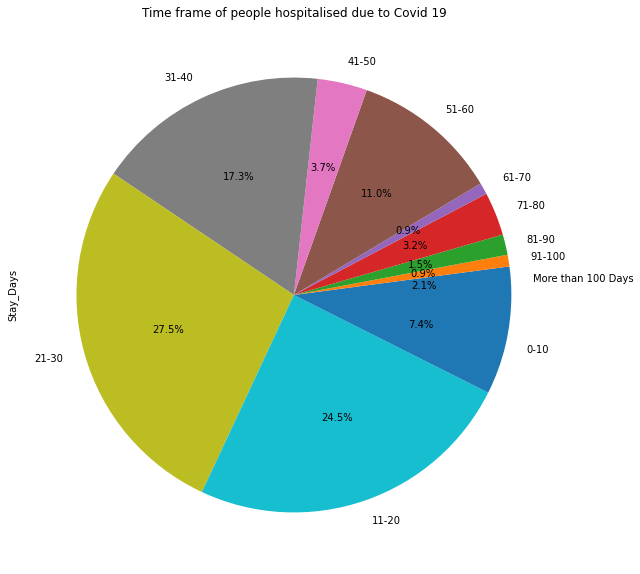

In [204]:
#info on target#
Dataset['Stay_Days'].value_counts().sort_index(ascending= False).plot(kind = 'pie',title = 'Time frame of people hospitalised due to Covid 19',autopct='%1.1f%%',figsize = (16,10))
plt.savefig('Documentation/class_pie.png')

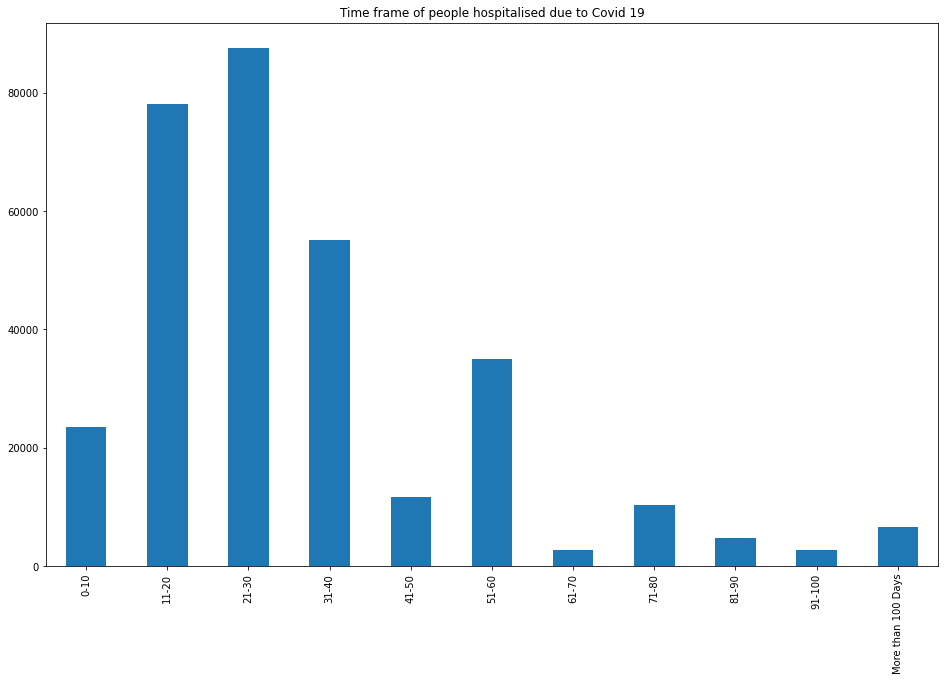

In [205]:
#info on target#
Dataset['Stay_Days'].value_counts().sort_index(ascending= True).plot(kind = 'bar',title = 'Time frame of people hospitalised due to Covid 19',figsize = (16,10))
plt.savefig('Documentation/clas_hist.png')

In [121]:
Dataset.shape

(318438, 18)

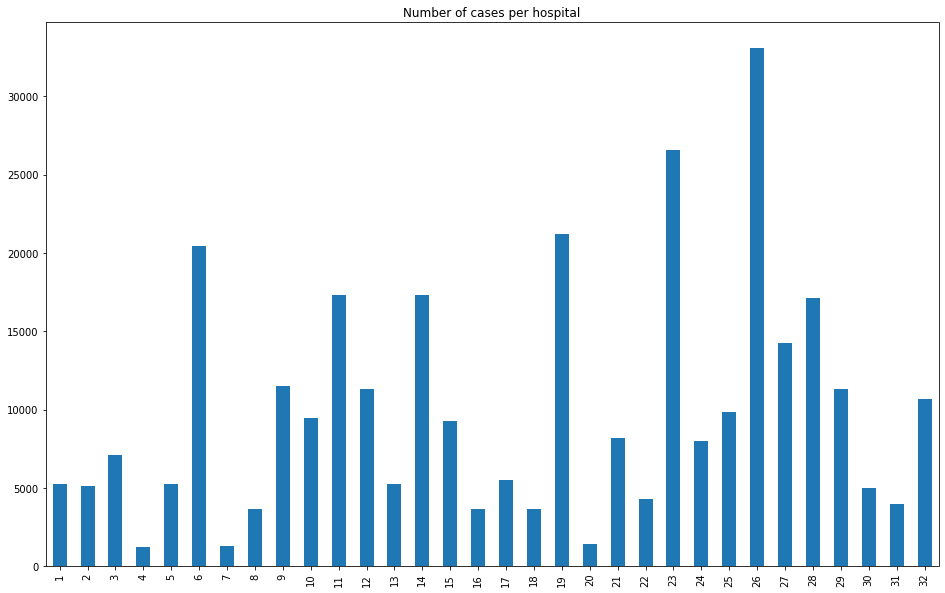

In [131]:
Dataset['Hospital'].value_counts().sort_index().plot(kind = 'bar',title = 'Number of cases per hospital',figsize = (16,10))
plt.savefig('Documentation/hospital_hist.png')

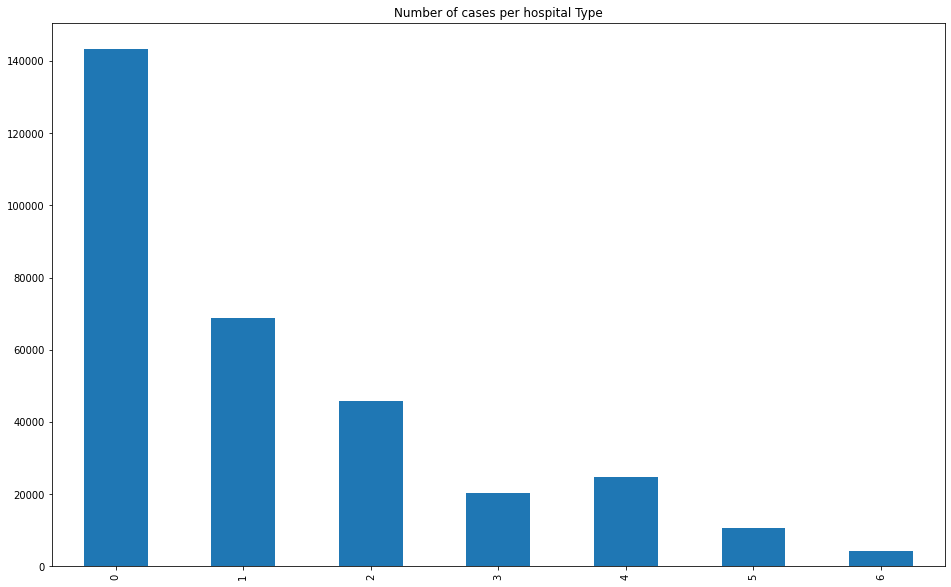

In [139]:
Dataset['Hospital_type'].value_counts().sort_index().plot(kind = 'bar',title = 'Number of cases per hospital Type',figsize = (16,10))
plt.savefig('Documentation/hospitalType_hist.png')

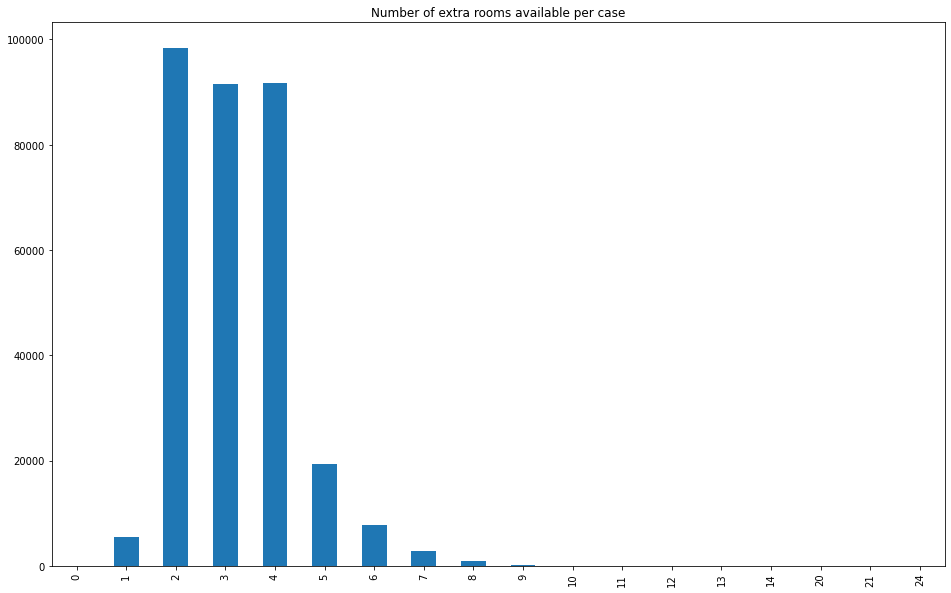

In [140]:
Dataset['Available_Extra_Rooms_in_Hospital'].value_counts().sort_index().plot(kind = 'bar',title = 'Number of extra rooms available per case',figsize = (16,10))
plt.savefig('Documentation/Extraroom_hist.png')

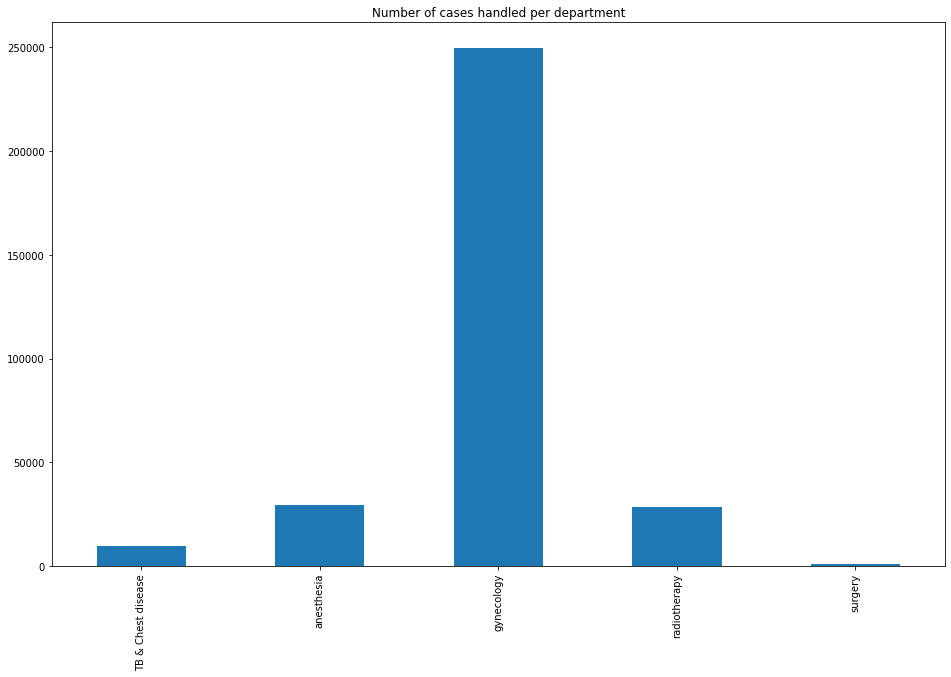

In [141]:
Dataset['Department'].value_counts().sort_index().plot(kind = 'bar',title = 'Number of cases handled per department',figsize = (16,10))
plt.savefig('Documentation/department_hist.png')

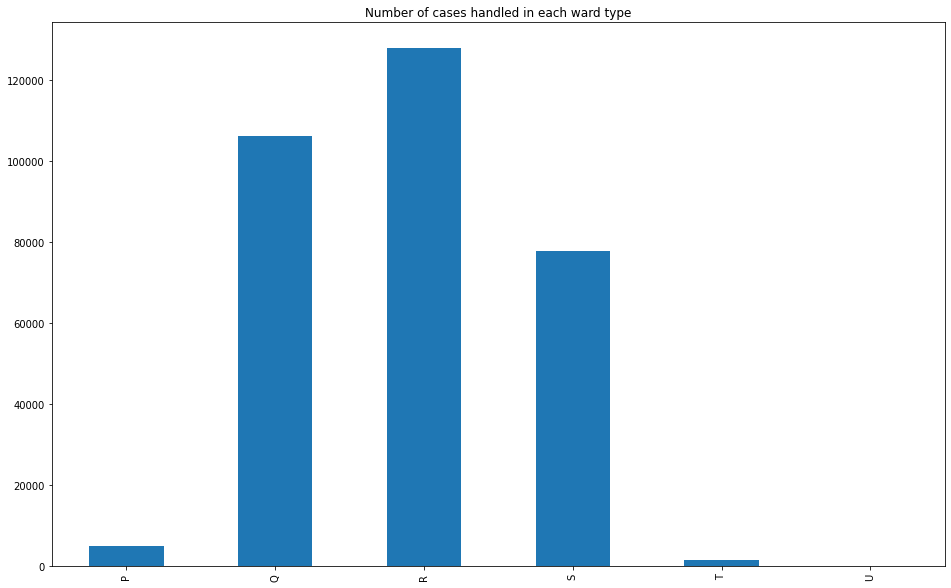

In [144]:
Dataset['Ward_Type'].value_counts().sort_index().plot(kind = 'bar',title = 'Number of cases handled in each ward type',figsize = (16,10))
plt.savefig('Documentation/ward_hist.png')

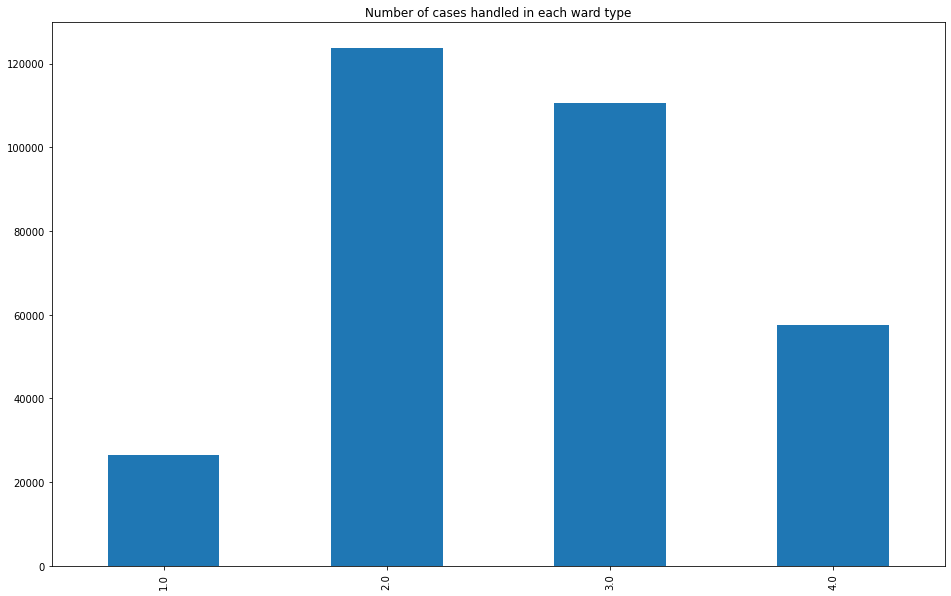

In [145]:
Dataset['Bed_Grade'].value_counts().sort_index().plot(kind = 'bar',title = 'Number of cases handled in each ward type',figsize = (16,10))
plt.savefig('Documentation/bed_hist.png')

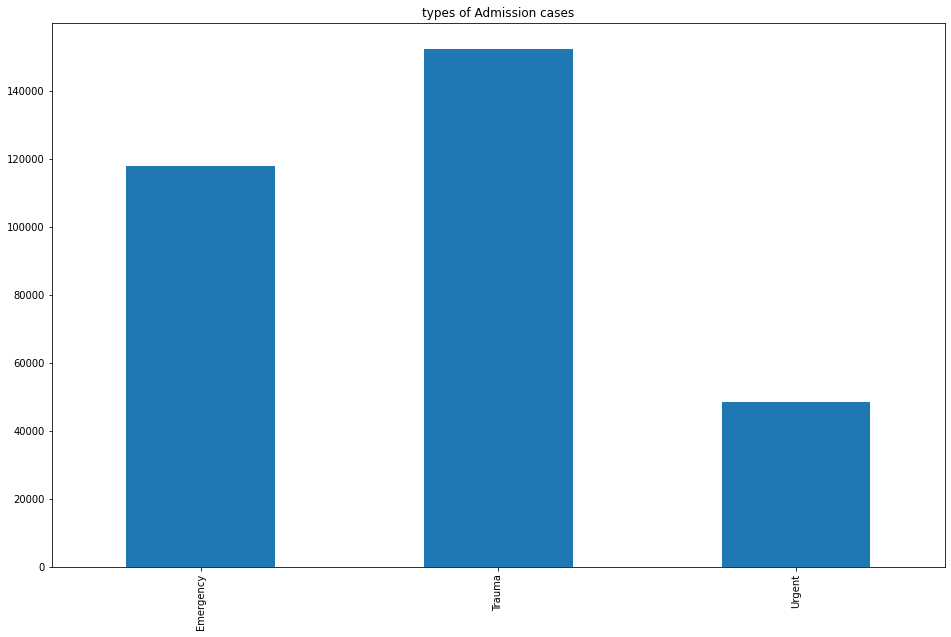

In [146]:
Dataset['Type of Admission'].value_counts().sort_index().plot(kind = 'bar',title = 'types of Admission cases',figsize = (16,10))
plt.savefig('Documentation/admin_hist.png')

# Testing algorithms

In [228]:
Data = pd.read_csv('Data/formated.csv')

In [229]:
Data.head()

,Unnamed: 0,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,0,8,2,3,2,3,2,2,5,2.0,7.0,1,2,2,5,4.911,0
1,1,2,2,5,2,2,2,3,5,2.0,7.0,0,2,2,5,5.954,4
2,2,10,4,1,0,2,1,3,4,2.0,7.0,0,2,2,5,4.745,3
3,3,26,1,2,1,2,2,2,3,2.0,7.0,0,2,2,5,7.272,4
4,4,26,1,2,1,2,2,3,3,2.0,7.0,0,2,2,5,5.558,4


In [230]:
test = Data.sample(n=200)

In [231]:
test = test.iloc[:,1:]

In [232]:
test.head(10)

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
289813,23,0,6,0,2,0,1,5,2.0,19.0,1,1,4,5,7.036,1
289743,6,0,6,0,3,0,1,5,3.0,8.0,0,0,2,4,4.719,1
218204,11,1,2,1,4,0,1,3,4.0,8.0,2,2,4,3,6.747,1
125780,32,5,9,1,2,0,3,1,1.0,20.0,2,2,4,4,3.432,5
121829,11,1,2,1,5,0,1,3,2.0,8.0,1,1,3,3,5.721,2
29211,23,0,6,0,3,0,2,5,3.0,8.0,2,1,2,7,5.997,2
2463,2,2,5,2,2,0,3,5,3.0,1.0,0,0,4,5,4.127,5
47115,12,0,9,1,3,0,2,1,2.0,1.0,1,0,2,7,8.085,1
117087,5,0,1,0,4,1,2,4,3.0,1.0,0,0,2,3,6.176,1
84100,27,0,7,1,4,0,1,2,1.0,8.0,0,2,4,4,4.416,1


In [234]:
y = test['Stay_Days'].to_numpy()
Y = y_matrix(11,y)

In [235]:
test = test.iloc[:,:-1]

In [236]:
test.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit
289813,23,0,6,0,2,0,1,5,2.0,19.0,1,1,4,5,7.036
289743,6,0,6,0,3,0,1,5,3.0,8.0,0,0,2,4,4.719
218204,11,1,2,1,4,0,1,3,4.0,8.0,2,2,4,3,6.747
125780,32,5,9,1,2,0,3,1,1.0,20.0,2,2,4,4,3.432
121829,11,1,2,1,5,0,1,3,2.0,8.0,1,1,3,3,5.721


In [237]:
X = test.to_numpy()

In [238]:
print(X)

[[23.     0.     6.    ...  4.     5.     7.036]
 [ 6.     0.     6.    ...  2.     4.     4.719]
 [11.     1.     2.    ...  4.     3.     6.747]
 ...
 [23.     0.     6.    ...  4.     6.     3.615]
 [18.     3.    13.    ...  2.     6.     4.43 ]
 [ 6.     0.     6.    ...  2.     4.     4.671]]


In [239]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 289813 to 162365
Data columns (total 15 columns):
Hospital                             200 non-null int64
Hospital_type                        200 non-null int64
Hospital_city                        200 non-null int64
Hospital_region                      200 non-null int64
Available_Extra_Rooms_in_Hospital    200 non-null int64
Department                           200 non-null int64
Ward_Type                            200 non-null int64
Ward_Facility                        200 non-null int64
Bed_Grade                            200 non-null float64
City_Code_Patient                    197 non-null float64
Type of Admission                    200 non-null int64
Illness_Severity                     200 non-null int64
Patient_Visitors                     200 non-null int64
Age                                  200 non-null int64
Admission_Deposit                    200 non-null float64
dtypes: float64(3), int64(12)
memory usag

In [240]:
#Neural Network# 
sigmoid = lambda z: 1/(1+np.exp(-z))
deriv = lambda a: a*(1-a)
param = [15,12,11]
model1 = Neural_Network(param,sigmoid,deriv)

In [241]:
model1.predict(X)

array([[0.65192596, 0.71553827, 0.65213822, ..., 0.52583372, 0.48370664,
        0.21245208],
       [0.33559529, 0.27652374, 0.33569419, ..., 0.274443  , 0.26441866,
        0.17402951],
       [0.136226  , 0.05683294, 0.13618894, ..., 0.1573797 , 0.16417139,
        0.19342122],
       ...,
       [0.71347726, 0.69836682, 0.713969  , ..., 0.38725445, 0.42520968,
        0.64288224],
       [0.74533077, 0.94344714, 0.74502883, ..., 0.88404345, 0.86806583,
        0.76378526],
       [0.01030574, 0.00715726, 0.01027361, ..., 0.0616636 , 0.07896627,
        0.24094835]])

In [249]:
model1.train(X,Y,alpha = 0.1 ,epoch=1)

In [244]:
model1.Layers[0].W

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, na

In [213]:
#multiclass logistic regression#
model2 = LogisticModel(multiclass=True)
theta0 = np.random.randn(11,16)
model2.train(X,y,theta0,alpha=0.1,tol = 0.001,L=0,num_iter=1000)

In [253]:
model2.W

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, na

In [254]:
y

array([ 1,  1,  1,  5,  2,  2,  5,  1,  1,  1,  5,  3,  0,  1,  1,  4,  5,
        5,  4, 10,  5,  1,  4,  2,  5,  2,  1,  0,  9, 10,  2,  5,  3,  0,
        3,  2,  1,  2,  1,  5,  5,  2,  3,  1,  1,  3,  2,  2,  2,  3,  5,
        9,  2,  3,  3,  1,  3,  5,  1,  1,  2,  5,  5,  4,  3,  1,  1,  2,
        1,  5,  1,  1,  0,  2,  2,  2,  7,  0,  2,  8,  2,  2,  2,  0,  2,
        2,  2,  2,  3,  3,  2,  3,  2,  4,  2,  7,  1,  3,  3,  2,  5,  2,
        5,  3,  1,  6,  1,  2,  7,  2,  2,  4,  3,  3,  4,  2, 10,  1,  2,
        2,  4,  2,  9,  5,  1,  0,  2,  3,  2,  3,  1,  2,  1,  5,  5,  2,
        2,  2,  2,  3,  2,  4,  1,  2,  2,  1,  3,  2,  1,  2,  3,  1,  2,
        3,  0,  0,  2,  1, 10,  2,  1,  1,  2,  3,  3,  1,  3,  1,  1,  2,
        1,  2,  3,  6,  3,  1,  2,  1,  2,  2,  2,  1,  2,  1,  2,  3,  0,
        1,  8,  2,  1,  1,  5,  3,  7,  1,  5,  2,  3,  3])

In [252]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([ 4,  2,  2,  2,  5,  1,  0,  5,  5,  3,  1,  1,  1,  3,  3,  3,  1,
        1,  7,  5,  8,  1,  2,  7,  2,  3,  0,  2,  2,  2,  3,  2,  4,  0,
        2,  1,  7,  4,  2,  1,  2,  3,  2,  1,  2,  3,  2,  3,  1,  2,  1,
        1,  1,  3,  2,  3,  7,  4,  5,  1,  1,  3,  3,  3,  7,  0,  8,  1,
        1,  8,  1,  5,  3,  2,  0,  1,  1,  2,  0,  2,  3,  3,  3,  0,  0,
        1,  2,  3,  3,  1,  1,  3,  1,  2,  0,  3,  1, 10,  2,  2,  2,  2,
        1,  5,  1,  5,  5,  1,  0,  2,  2,  2,  1,  5, 10,  3,  7,  1,  2,
        2,  1,  9,  1,  1,  5,  1,  1,  5,  3,  4,  5,  5,  2,  2,  1,  0,
        1,  0,  4,  2,  6,  2,  4,  1,  7,  1,  4,  2,  2,  3,  2,  7,  3,
        2,  5,  1,  3,  1,  7,  5,  3,  3,  1,  1,  2,  0,  5,  5,  2,  1,
        2,  2,  2,  3,  5,  1,  3,  3,  2,  2,  5,  1,  0,  3,  0,  1,  2,
        2,  2,  2,  1,  2,  2,  1,  1,  2,  1,  0,  2,  5])